## Linear Regression
Linear Regression is a supervised learning algorithm used for predicting a continuous dependent variable (𝑌) based on one or more independent variables (X). It establishes a linear relationship between the input variables and the target variable.

Advantage: 
- Easy to understand and implement and provides clear relationships between independent variables (X) and the dependent variable (Y).
- Works Well with Linearly Separable Data
  
Disadvantage: 
- Sensitive to outliers
- Prone to overfitting with many features
  
Linear Regression is the simplest regression method, it has its weakness of overfitting if multicollinearity exists. Regularization can be done to eliminate this problem. Linear regression has two extensions for regularization called L1 and L2 which are Rigid Regression and Lasso Regression that are used to regularized. There also exist another extension called ElasticNet which is a combination of L1 and L2 regularization.

For this lab enhancement, the focus will be to eliminate the weakness of overfitting when there are multiple features and compare how different types of regularization affects the performance of the model.

## Evaluation Metrics
### 1️⃣ Mean Squared Error (MSE) & Root Mean Squared Error (RMSE)
- **Mean Squared Error (MSE)** calculates the average squared difference between actual and predicted values.
- **Root Mean Squared Error (RMSE)** is the square root of MSE.
- **MSE** is sensitive to outliers since large errors contribute significantly.

#### **Formula:**
$$
MSE =  \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

$$
RMSE = \sqrt{MSE}
$$

#### **Where:**  
$$
n = \text{Number of data points}  
$$
$$
y_i = \text{Actual value of the dependent variable}  
$$
$$
\hat{y}_i = \text{Predicted value}  
$$

---

### 2️⃣ Coefficient of Determination (R²)
- Measures how well the regression model explains the variability of the dependent variable.
- **R²** ranges between **0 and 1** (higher values indicate a better fit).

#### **Formula:**
$$
R^2 = 1- \frac{RSS}{TSS}
$$

#### **Where:**  
- **Residual Sum of Squares (RSS):**  
  $$
  RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
- **Total Sum of Squares (TSS):**  
  $$
  TSS = \sum_{i=1}^{n} (y_i - \overline{y})^2
  $$

#### **Variables:**  
$$
y_i = \text{Actual values}  
$$
$$
\hat{y}_i = \text{Predicted values}  
$$
$$
\overline{y} = \text{Mean of actual values}  
$$

---

### 3️⃣ Model Accuracy (for Regression)
- Regression **does not use traditional classification accuracy** because it predicts continuous values.
- Instead, the model score (R²) is often **interpreted as accuracy** in regression models.
- The model score is given by:

#### **Formula:**
$$
\text{Accuracy} = R^2 \times 100
$$

#### **Where:**  
$$
R^2 = \text{Coefficient of Determination (explains model performance)}
$$
- Accuracy is expressed as a **percentage** to interpret how well the model fits the data.


## Hyperparameter Tuning of Models
Although linear regression doesn't support hyperparameter tuning, rigid, lasso, and elasticnet supports hyperparameter tuning. Grid Search method will be used to find the best possible and most optimal hyperparameter to be used in the models to obtain the best performance from the models. Cross-validation will be used to determine which combination of hyperparameters are the best using R-square as coefficient of determination.

### Cleaning dataset and preprocessing

In [1]:
import pandas as pd  # For data manipulation and analysis
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  # For normalization and encoding

# Step 1: Load the dataset
file_path = "cars.csv"  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Display initial dataset information
print("Initial Dataset Info:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Step 2: Drop irrelevant columns
print("\nDropping irrelevant columns...")
data = data.drop(columns=['Car_ID', 'Brand', 'Model'])

# Step 3: Normalize the numeric columns
print("\nApplying Min-Max Normalization...")
numeric_columns = ['Mileage', 'Engine', 'Power', 'Seats', 'Year', 'Kilometers_Driven', 'Price']
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Step 4: Perform encoding for categorical columns
print("\nEncoding categorical columns...")
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']  # Replace with your categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), 
                            columns=encoder.get_feature_names_out(categorical_columns))

# Combine the encoded columns with the original data (after dropping the original categorical columns)
data = data.drop(columns=categorical_columns)
data = pd.concat([data, encoded_data], axis=1)

# Step 5: Remove duplicates if any
print("\nChecking for duplicate rows...")
duplicates = data.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate rows. Dropping them...")
    data = data.drop_duplicates()
else:
    print("No duplicate rows found.")

# Rename cleaned data
cleaned_data = data

# Step 6: Display cleaned dataset information
print("\nCleaned Dataset Info:")
print(cleaned_data.info())
print("\nFirst 5 rows of cleaned dataset:")
print(cleaned_data.head())


ModuleNotFoundError: No module named 'pandas'

This lab enhancement will be focusing on the Target variable "Price" and the other variables as feature.

### Linear Regression

The linear regression will be trained and evaluation metrics like MSE, RMSE, R-square, and Accuracy will be obtained to evaluate the performance between normal and regularized linear regression.

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for linear regression
X = cleaned_data.drop(columns='Price')  # Features
y = cleaned_data['Price']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test) * 100

# Print Evaluation Metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Accuracy): {accuracy:.2f}%")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.0097
Root Mean Squared Error (RMSE): 0.0985
R-squared (R²): 0.7773
Accuracy): 77.73%


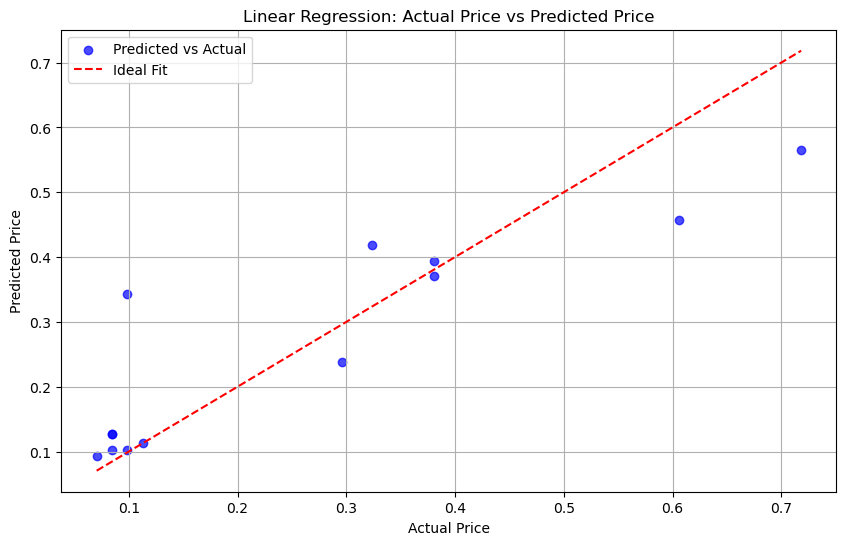

In [46]:
import matplotlib.pyplot as plt
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Linear Regression: Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

### Ridge Regression

Before using the ridge regression model to find the accuracy, we can peform hyperparameter tuning using grid search with cross validation using R-square. Linear Regression did'nt need to perform hyperparameter tuning as it is simple and doesn't require it. By doing so, we can obtain a better result. The hyperparameter to optimize are: 

- alpha: Controls the overall strength of regularization
- fit_intercept: Include Intercept in Model or not
- solver: Determines the algorithm used to minimize the Ridge Regression cost function

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for Ridge regression
X = cleaned_data.drop(columns='Price')  # Replace 'Price' with your target variable column
y = cleaned_data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV for Ridge Regression
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga']
}

print("Tuning Ridge Regression...")
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("\nRidge Best Parameters:", best_params)
print("Ridge Best Cross-Validated R2 Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = best_model.score(X_test, y_test) * 100  # Accuracy based on R2 score

print("\nRidge Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2}")
print(f"Accuracy: {accuracy:.2f}%")


Tuning Ridge Regression...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Ridge Best Parameters: {'alpha': 1, 'fit_intercept': True, 'solver': 'svd'}
Ridge Best Cross-Validated R2 Score: 0.5895166256839092

Ridge Regression Model Evaluation:
Mean Squared Error (MSE): 0.0070454022250297866
Root Mean Squared Error (RMSE): 0.0839
R-squared (R2): 0.8381288437926807
Accuracy: 83.81%


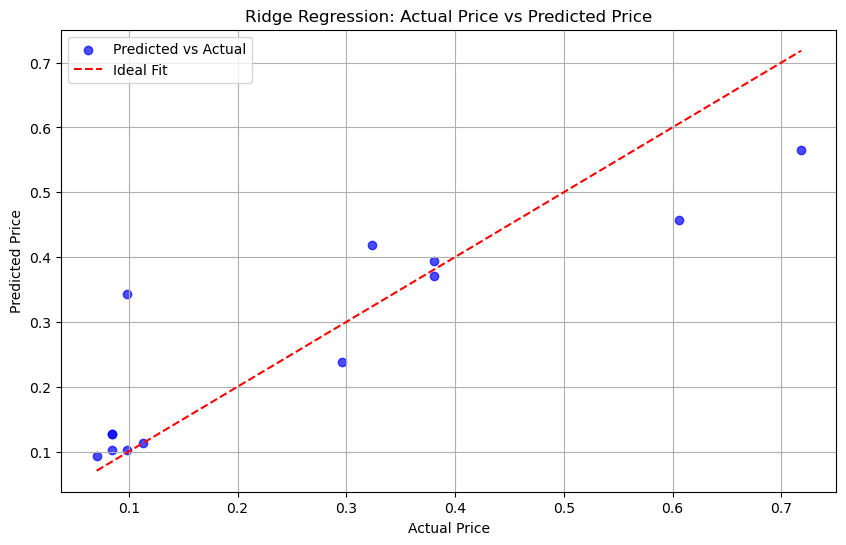

In [44]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Ridge Regression: Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

### Lasso Regression
Before using the lasso regression model to find the accuracy, we can also peform hyperparameter tuning using grid search with cross validation using R-square like Rigid Regression to use the most optimal hyperparameter to train the model. The hyperparameters to optimize are:

- alpha: Controls the overall strength of regularization
- fit_intercept: Include Intercept in Model or not
- max_iter: Defines the maximum number of iterations for the optimization algorithm to converge.

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for lasso regression
X = cleaned_data.drop(columns='Price')
y = cleaned_data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000]
}


grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validated R2 Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = best_model.score(X_test, y_test) * 100

print(f"\nLasso Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2}")
print(f"Accuracy: {accuracy:.2f}%")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'alpha': 0.01, 'fit_intercept': True, 'max_iter': 1000}
Best Cross-Validated R2 Score: 0.5770855953249658

Lasso Regression Model Evaluation:
Mean Squared Error (MSE): 0.009421300983272915
Root Mean Squared Error (RMSE): 0.0971
R-squared (R2): 0.7835415446230121
Accuracy: 78.35%


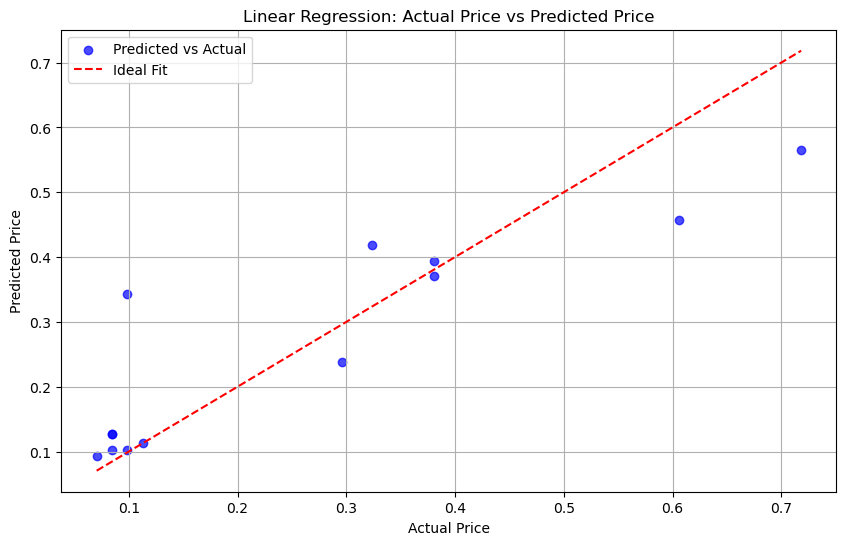

In [37]:
import matplotlib.pyplot as plt 

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Lasso Regression: Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

## ElasticNet

Hyperparameter tuning using grid search with cross validation using R-square will be performed on ElasticNet to get the best possible performance from the model. The hyperparameters to optimize are:
- alpha: Controls the overall strength of regularization
- l1_ratio: Determines the mix between L1 (Lasso) and L2 (Ridge) regularization
- fit_intercept: Include Intercept in Model or not
- max_iter: Defines the maximum number of iterations for the optimization algorithm to converge.

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the data for elasticnet regression
X = cleaned_data.drop(columns='Price')
y = cleaned_data['Price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 1.0],  # Mix between L1 and L2 regularization
    'fit_intercept': [True, False],
    'max_iter': [1000, 2000, 3000]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validated R2 Score:", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy = best_model.score(X_test, y_test) * 100

print(f"\nElasticNet Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2}")
print(f"Accuracy: {accuracy:.2f}%")



Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000}
Best Cross-Validated R2 Score: 0.5852640105870541

ElasticNet Regression Model Evaluation:
Mean Squared Error (MSE): 0.007560805685329969
Root Mean Squared Error (RMSE): 0.0870
R-squared (R2): 0.8262872268959689
Accuracy: 82.63%


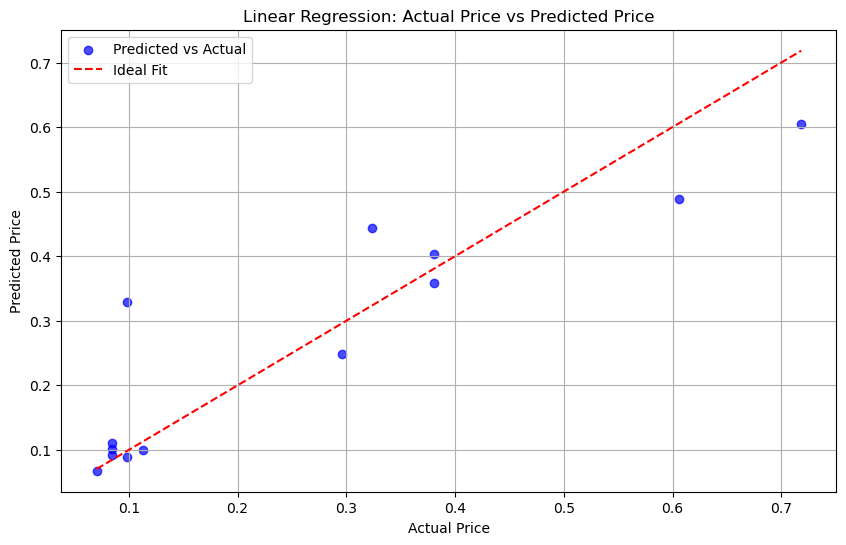

In [39]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('ElasticNet Regression: Actual Price vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

## Findings

### Mean Square Error
1. Linear Regression: 0.0097
2. Rigid Regression: 0.0070454022250297866
3. Lasso Regression: 0.009421300983272915
4. ElasticNet: 0.007560805685329969

- Lower MSE means the model makes fewer errors in predictions.
- Ridge Regression (0.0070) has the lowest MSE, meaning it fits the data better with fewer squared errors.
- ElasticNet (0.0075) also performs well, slightly higher than Ridge.
- Lasso (0.0094) and Linear Regression (0.0097) have higher MSE, indicating slightly more prediction errors.

### Root Mean Square Error
1. Linear Regression: 0.0985
2. Rigid Regression: 0.0839
3. Lasso Regression: 0.0971
4. ElasticNet: 0.0870

- RMSE is the square root of MSE, making it more interpretable as it's in the same unit as the target variable.
- Lower RMSE means the model fits better.
- Ridge Regression (0.0839) has the lowest RMSE, meaning its predictions are closest to the actual values.
- ElasticNet (0.0870) is the second-best.
- Linear Regression (0.0985) and Lasso (0.0971) have slightly higher errors, indicating that they may not be as stable.
  
### R-square
1. Linear Regression: 0.7773
2. Rigid Regression: 0.8381288437926807
3. Lasso Regression: 0.7835415446230121
4. ElasticNet: 0.8262872268959689

- R² measures how well the model explains the variance in the target variable (ranges from 0 to 1).
- Higher R² means a better fit.
- Ridge Regression (0.8381) has the highest R², meaning 83.81% of the variance in the target variable is explained by the model.
- ElasticNet (0.8263) is the second best, meaning it's also a strong predictor.
- Linear Regression (0.7773) and Lasso (0.7835) are lower, meaning they explain less variability compared to Ridge and ElasticNet.

### Accuracy
1. Linear Regression: 77.73%
2. Rigid Regression: 83.81%
3. Lasso Regression: 78.35%
4. ElasticNet: 82.63%

- Accuracy in regression models is typically interpreted as R² × 100%.
- Ridge Regression (83.81%) is the most accurate, closely followed by ElasticNet (82.63%).
- Linear Regression (77.73%) and Lasso (78.35%) have lower accuracy, indicating they may not generalize as well.


### Conclusion

Ridge Regression performs the best in this scenario because it effectively prevents overfitting while maintaining strong predictive accuracy. Unlike standard Linear Regression, which can struggle when features are highly correlated, Ridge adds a penalty term to the model’s coefficients, preventing them from becoming too large and unstable. This helps in improving generalization to unseen data. ElasticNet also performs well because it combines the benefits of both Ridge and Lasso Regression. It not only prevents overfitting like Ridge but also performs some feature selection like Lasso, making it useful when dealing with datasets that may have redundant or irrelevant variables. On the other hand, Lasso and standard Linear Regression do not perform as well. Lasso tends to shrink some coefficients to zero, which can be beneficial for feature selection but may result in slightly less stable predictions.